# Regression Infrared using PyTorch and Tensorflow
## Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
import pandas as pd
data = pd.read_csv("Infrared.csv")
data

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.3475,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2175,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2400,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,35.0200,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.29


In [ ]:
data.isnull().sum()

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64

In [ ]:
# Handling missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Pisahkan kolom numerik dan kategorikal
categorical_columns = ["Gender", "Age", "Ethnicity"]  # Sesuaikan dengan dataset
numerical_columns = list(set(data.columns) - set(categorical_columns) - {"aveOralM"})
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])

In [ ]:
# One-Hot Encoding untuk data kategori
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_data = encoder.fit_transform(data[categorical_columns])
categorical_df = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_columns))


In [ ]:
# Normalisasi fitur numerik
scaler_X = StandardScaler()
numerical_data = scaler_X.fit_transform(data[numerical_columns])
numerical_df = pd.DataFrame(numerical_data, columns=numerical_columns)

In [ ]:
# Normalisasi target
scaler_y = StandardScaler()
target = scaler_y.fit_transform(data[["aveOralM"]]).flatten()

In [ ]:
# Gabungkan fitur numerik dan kategori
features = pd.concat([numerical_df, categorical_df], axis=1)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Konversi ke PyTorch Tensors
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test.values, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


# Model Deep Learning (PyTorch)

In [ ]:
# Model Deep Learning dengan PyTorch
class PyTorchModel(nn.Module):
    def __init__(self, input_dim):
        super(PyTorchModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
# Inisialisasi model
pytorch_model = PyTorchModel(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)


In [ ]:
# Training loop
for epoch in range(500):
    optimizer.zero_grad()
    outputs = pytorch_model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    scheduler.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/500], Loss: {loss.item():.4f}')

Epoch [100/500], Loss: 0.1208
Epoch [200/500], Loss: 0.0653
Epoch [300/500], Loss: 0.0530
Epoch [400/500], Loss: 0.0387
Epoch [500/500], Loss: 0.0391


In [ ]:
# Evaluasi PyTorch
pytorch_model.eval()
with torch.no_grad():
    y_pred_torch = pytorch_model(X_test_torch).numpy()

In [ ]:
# Konversi hasil prediksi ke skala asli
y_pred_torch = scaler_y.inverse_transform(y_pred_torch)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Evaluasi model
mse_torch = mean_squared_error(y_test_actual, y_pred_torch)
rmse_torch = np.sqrt(mse_torch)
r2_torch = r2_score(y_test_actual, y_pred_torch)
print(f'PyTorch Model - MSE: {mse_torch:.7f}, RMSE: {rmse_torch:.7f}, R²: {r2_torch:.7f}')


PyTorch Model - MSE: 0.0583272, RMSE: 0.2415102, R²: 0.7230063


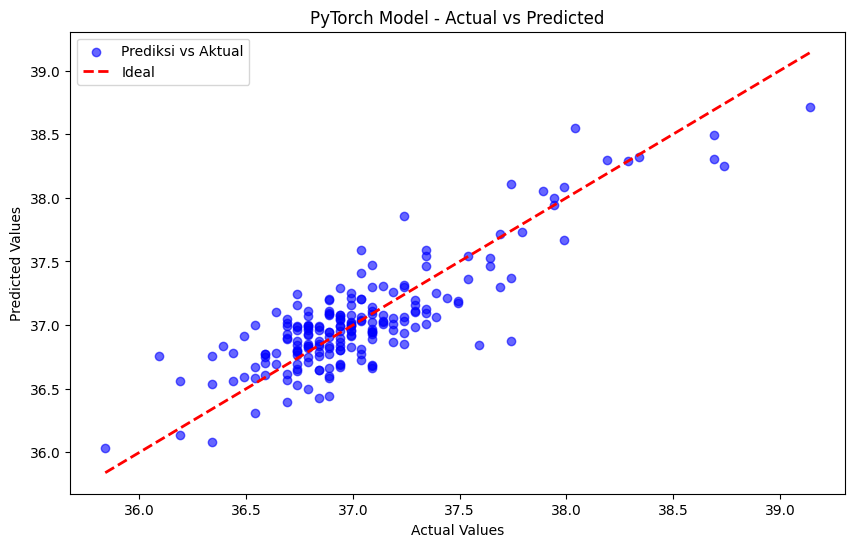

In [ ]:
# Visualisasi hasil prediksi vs aktual untuk PyTorch
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred_torch, alpha=0.6, color='blue', label='Prediksi vs Aktual')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], color='red', linestyle='dashed', linewidth=2, label='Ideal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("PyTorch Model - Actual vs Predicted")
plt.legend()
plt.show()


# Model Deep Learning (TensorFlow)

In [ ]:
# Model Deep Learning dengan TensorFlow
model_tf = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_tf.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse')

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training model TensorFlow
history = model_tf.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7967 - val_loss: 0.2160
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2899 - val_loss: 0.2189
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2542 - val_loss: 0.2000
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2179 - val_loss: 0.2101
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2411 - val_loss: 0.2106
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2131 - val_loss: 0.2132
Epoch 7/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2354 - val_loss: 0.2577
Epoch 8/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2762 - val_loss: 0.3163
Epoch 9/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3588 - val_loss: 0.2917
Epoch 10/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2230 - val_loss: 0.2681
Epoch 11/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1639 - val_loss: 0.2051
Epoch 12/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1

In [ ]:
# Evaluasi TensorFlow
y_pred_tf = model_tf.predict(X_test)
y_pred_tf = scaler_y.inverse_transform(y_pred_tf)
mse_tf = mean_squared_error(y_test_actual, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test_actual, y_pred_tf)
print(f'TensorFlow Model - MSE: {mse_tf:.7f}, RMSE: {rmse_tf:.7f}, R²: {r2_tf:.7f}')



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
TensorFlow Model - MSE: 0.0676969, RMSE: 0.2601862, R²: 0.6785099


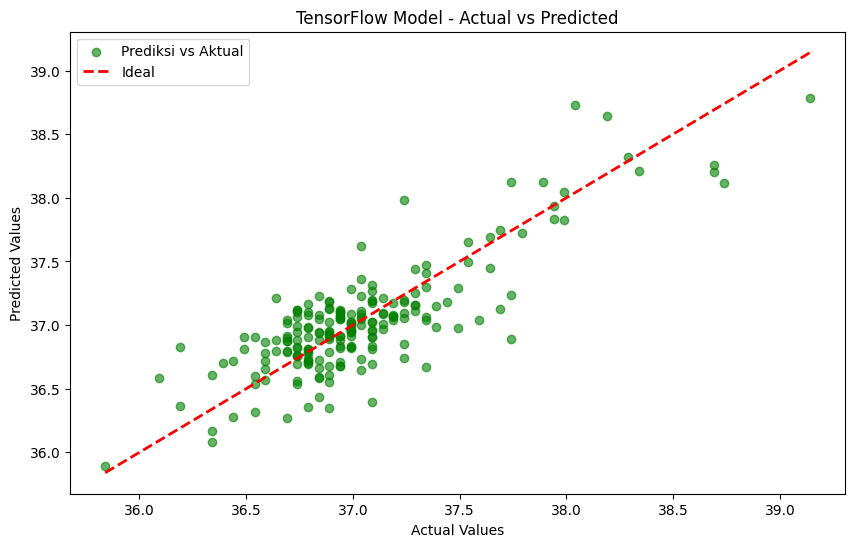

In [ ]:
# Visualisasi hasil prediksi vs aktual untuk TensorFlow
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred_tf, alpha=0.6, color='green', label='Prediksi vs Aktual')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], color='red', linestyle='dashed', linewidth=2, label='Ideal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("TensorFlow Model - Actual vs Predicted")
plt.legend()
plt.show()


# Penjelasan Model Deep Learning (PyTorch dan TensorFlow)

## 1. Model Deep Learning:

### **PyTorch Model:**
Model ini dibangun menggunakan arsitektur jaringan saraf dalam (deep neural network) dengan 4 lapisan penuh (fully connected layers). Model ini memiliki input layer dengan jumlah fitur yang sama dengan jumlah kolom pada `X_train`. Lapisan-lapisan tersembunyi (hidden layers) menggunakan fungsi aktivasi ReLU, dan output layer hanya memiliki satu neuron untuk memprediksi variabel target (`aveOralM`).

**Struktur lapisan model PyTorch:**
- Layer 1: 256 neuron, fungsi aktivasi ReLU
- Layer 2: 128 neuron, fungsi aktivasi ReLU
- Layer 3: 64 neuron, fungsi aktivasi ReLU
- Layer 4: 32 neuron, fungsi aktivasi ReLU
- Output: 1 neuron (output nilai prediksi)

### **TensorFlow Model:**
Model ini dibangun dengan menggunakan API `Sequential` dari Keras. Model ini juga memiliki arsitektur yang mirip dengan model PyTorch, yaitu dengan beberapa lapisan tersembunyi yang menggunakan fungsi aktivasi ReLU.

**Struktur lapisan model TensorFlow:**
- Layer 1: 256 neuron, fungsi aktivasi ReLU
- Layer 2: 128 neuron, fungsi aktivasi ReLU
- Layer 3: 64 neuron, fungsi aktivasi ReLU
- Layer 4: 32 neuron, fungsi aktivasi ReLU
- Output: 1 neuron (output nilai prediksi)

Kedua model menggunakan teknik optimasi yang serupa, yaitu Adam optimizer, dan menggunakan Mean Squared Error (MSE) sebagai fungsi kerugian.

---

## 2. Matriks Evaluasi (RMSE, MSE, R²)


### **MSE (Mean Squared Error):**
MSE mengukur rata-rata kuadrat selisih antara nilai aktual dan nilai prediksi. Rumus MSE:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Dimana:
- \( y_i \) adalah nilai aktual.
- \( \hat{y}_i \) adalah nilai prediksi.
- \( n \) adalah jumlah sampel.


### **RMSE (Root Mean Squared Error):**
RMSE adalah akar kuadrat dari MSE dan memberikan ukuran kesalahan yang lebih mudah dipahami, karena berada dalam satuan yang sama dengan target variabel.
$$
RMSE = \sqrt{MSE}
$$

### **R² (Koefisien Determinasi):**
R² mengukur seberapa baik model menjelaskan variasi dalam data. Nilai R² berkisar antara 0 (tidak ada hubungan) hingga 1 (hubungan sempurna).
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
Dimana:
- \( y_i \) adalah nilai aktual
- \( \hat{y}_i \) adalah nilai prediksi
- \( \bar{y} \) adalah rata-rata nilai aktua

---

## 3. Perbandingan Model Hasil Model PyTorch dan TensorFlow
### **Hasil Model:**
- **PyTorch Model:**
  - **MSE (Mean Squared Error):** 0.0583272
  - **RMSE (Root Mean Squared Error):** 0.2415102
  - **R² (Koefisien Determinasi):** 0.7230063

- **TensorFlow Model:**
  - **MSE (Mean Squared Error):** 0.0676969
  - **RMSE (Root Mean Squared Error):** 0.2601862
  - **R² (Koefisien Determinasi):** 0.6785099

### **Perbandingan Metrik Evaluasi:**

#### 1. **MSE (Mean Squared Error):**
   - **PyTorch:** 0.0583
   - **TensorFlow:** 0.0677
   
   **Interpretasi:**
   - Model PyTorch menghasilkan nilai MSE yang lebih rendah dibandingkan TensorFlow, yang menunjukkan bahwa model PyTorch memiliki selisih rata-rata yang lebih kecil antara nilai prediksi dan nilai aktual. MSE yang lebih rendah menunjukkan performa model yang lebih baik dalam memprediksi data.

#### 2. **RMSE (Root Mean Squared Error):**
   - **PyTorch:** 0.2415
   - **TensorFlow:** 0.2602
   
   **Interpretasi:**
   - Nilai RMSE untuk PyTorch juga lebih rendah, yang mengindikasikan bahwa kesalahan prediksi rata-rata pada model PyTorch lebih kecil daripada pada model TensorFlow. RMSE yang lebih kecil berarti model lebih akurat dalam prediksi.

#### 3. **R² (Koefisien Determinasi):**
   - **PyTorch:** 0.7230
   - **TensorFlow:** 0.6785
   
   **Interpretasi:**
   - **PyTorch** memiliki nilai \( R^2 \) yang lebih tinggi, yang berarti model PyTorch dapat menjelaskan lebih banyak variasi dalam data dibandingkan dengan model TensorFlow. Nilai \( R^2 \) yang lebih tinggi mendekati 1 menunjukkan bahwa model PyTorch lebih efektif dalam menggambarkan hubungan antara variabel independen dan target variabel (aveOralM).

---

## 4. Kesimpulan
### **Kesimpulan Perbandingan:**
1. **PyTorch** menunjukkan performa yang lebih baik secara keseluruhan berdasarkan ketiga metrik:
   - **MSE dan RMSE yang lebih rendah** menunjukkan bahwa model PyTorch lebih akurat dalam memprediksi nilai target.
   - **R² yang lebih tinggi** menunjukkan bahwa model PyTorch lebih baik dalam menjelaskan variasi data dibandingkan model TensorFlow.

2. **TensorFlow** meskipun memiliki performa yang sedikit lebih rendah, tetap memberikan hasil yang cukup baik, dengan nilai MSE dan RMSE yang cukup rendah serta \( R^2 \) yang masih menunjukkan kemampuan model untuk menjelaskan variasi data.

Secara keseluruhan, **PyTorch** lebih unggul, namun **TensorFlow** tetap menjadi alternatif yang baik dengan perbedaan yang tidak terlalu signifikan.

